## Importing Libraries

In [21]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from nltk.corpus import stopwords

import re
import pandas as pd
import nltk
import string
## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [107]:
## From Dr. Gates Code {Not required till Word Cloud}

import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

## Loading All Tycons Data

In [23]:
df_Tycon = pd.read_csv("NewHeadlines_Elon.csv",encoding="ISO-8859-1")
df_Tycon

,LABEL,Date,Source,Title,Headline
0,Elon Musk,2023-01-23,Wired,Tesla s Problems Go Way Beyond Elon Musk,giant alienating customers bringing less revenue falling behind legacy carmakers
1,Elon Musk,2023-01-21,Engadget,Elon Musk defends funding secured tweets in Tesla shareholder trial,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...
2,Elon Musk,2023-02-03,Engadget,Jury rules Elon Musk is not liable for shareholder losses after funding secured tweets,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...
3,Elon Musk,2023-01-24,Engadget,Elon Musk says his SpaceX shares would ve funded his plan to take Tesla private,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...
4,Elon Musk,2023-02-09,Engadget,SpaceX s first attempt to fire all Starship engines at once ends with mixed results,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...
...,...,...,...,...,...
495,Warren Buffett,2023-01-19,Motley Fool,Warren Buffett Stocks That Could Soar to in According to Wall Street,These stocks tanked analysts have lofty expectations this year
496,Warren Buffett,2023-01-23,Motley Fool,Buffett Tech Stock I Can t Get Enough Of,Fast growth free cash flow strong customer retention just reasons Snowflake stock
497,Warren Buffett,2023-01-10,Motley Fool,Warren Buffett Stocks Down More Than to Buy Before They Start Climbing Again,Whether investing have decades experience following Buffett lead these beaten down stocks could ...
498,Warren Buffett,2023-01-11,Motley Fool,Warren Buffett Stocks You Can Buy in January and Hold Forever,These stocks stand great long term buys this month


## Keeping only Headlines

In [38]:
df_Musk = df_Tycon[df_Tycon["LABEL"] == "Elon Musk"]

df_Musk = df_Musk.drop(["LABEL", "Date", "Source", "Title"], axis =1)
df_Musk

,Headline
0,giant alienating customers bringing less revenue falling behind legacy carmakers
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...
...,...
95,last recorded flight Brownsville Texas Elon Musk private about weeks before bought Twitter said ...
96,Contrasting portraits emerge closing arguments class action lawsuit against Musk misleading inve...
97,Since Musk took over Twitter spreading conspiracy theories banning journalists eroded much goodw...
98,lawsuit alleging Elon Musk manipulated Tesla href https reuters companies TSLA target blank TSLA...


In [27]:
df_Musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  100 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [30]:
df_Musk.dropna(inplace=True)
df_Musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  100 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


pandas.core.series.Series

## Preprocessing

### Removing Punctuations, Numbers and making Lower Case

In [39]:
#Converting to lower case: making the column a string and then converting to lower case
df_Musk["no_punc_low_c"] = df_Musk["Headline"].str.lower()
df_Musk

,Headline,no_punc_low_c
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...
...,...,...
95,last recorded flight Brownsville Texas Elon Musk private about weeks before bought Twitter said ...,last recorded flight brownsville texas elon musk private about weeks before bought twitter said ...
96,Contrasting portraits emerge closing arguments class action lawsuit against Musk misleading inve...,contrasting portraits emerge closing arguments class action lawsuit against musk misleading inve...
97,Since Musk took over Twitter spreading conspiracy theories banning journalists eroded much goodw...,since musk took over twitter spreading conspiracy theories banning journalists eroded much goodw...
98,lawsuit alleging Elon Musk manipulated Tesla href https reuters companies TSLA target blank TSLA...,lawsuit alleging elon musk manipulated tesla href https reuters companies tsla target blank tsla...


In [41]:
#Removing the Punctuations and Numbers
def remove_punct_num(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_Musk['no_punc_low_c'] = df_Musk['no_punc_low_c'].apply(remove_punct_num)
df_Musk

,Headline,no_punc_low_c
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...
...,...,...
95,last recorded flight Brownsville Texas Elon Musk private about weeks before bought Twitter said ...,last recorded flight brownsville texas elon musk private about weeks before bought twitter said ...
96,Contrasting portraits emerge closing arguments class action lawsuit against Musk misleading inve...,contrasting portraits emerge closing arguments class action lawsuit against musk misleading inve...
97,Since Musk took over Twitter spreading conspiracy theories banning journalists eroded much goodw...,since musk took over twitter spreading conspiracy theories banning journalists eroded much goodw...
98,lawsuit alleging Elon Musk manipulated Tesla href https reuters companies TSLA target blank TSLA...,lawsuit alleging elon musk manipulated tesla href https reuters companies tsla target blank tsla...


### Tokenizing

In [47]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df_Musk["tokenized"] = df_Musk["no_punc_low_c"].apply(tokenization)
df_Musk.head()

,Headline,no_punc_low_c,tokenized
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]"
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...,"[elon, musk, said, that, just, because, tweets, something, does, mean, people, believe, will, ac..."
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,..."
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, when, took, witness, stand..."
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...,"[spacex, completed, first, full, static, fire, test, starship, quite, that, makes, first, orbita..."


### Removing Stop Words

In [87]:
# Storing Stopwords in List and Customizing it 

stopword = nltk.corpus.stopwords.words('english')
stopword.remove("not")
stopword.append("http")
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_Musk["no_stop_word"] = df_Musk['tokenized'].apply(remove_stopwords)
df_Musk.head(10)

,Headline,no_punc_low_c,tokenized,no_stop,stemmed,lemmatized,cleaned,no_stop_word
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alien, custom, bring, less, revenu, fall, behind, legaci, carmak]","[giant, alienating, customer, bringing, le, revenue, falling, behind, legacy, carmaker]",giant alienating customer bringing le revenue falling behind legacy carmaker,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]"
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...,"[elon, musk, said, that, just, because, tweets, something, does, mean, people, believe, will, ac...","[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi...","[elon, musk, said, tweet, someth, mean, peopl, believ, accordingli, tesla, chief, took, wit, sta...","[elon, musk, said, tweet, something, mean, people, believe, accordingly, tesla, chief, took, wit...",elon musk said tweet something mean people believe accordingly tesla chief took witness stand fr...,"[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi..."
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweet, claim, fund, secur, take, tesla, privat, share, juri, found, musk, lia...","[elon, musk, hook, tweet, claiming, funding, secured, take, tesla, private, share, jury, found, ...",elon musk hook tweet claiming funding secured take tesla private share jury found musk liable te...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,..."
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, when, took, witness, stand...","[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe...","[elon, musk, said, could, sold, spacex, share, take, tesla, privat, took, wit, stand, defend, fu...","[elon, musk, said, could, sold, spacex, share, take, tesla, private, took, witness, stand, defen...",elon musk said could sold spacex share take tesla private took witness stand defend funding secu...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe..."
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...,"[spacex, completed, first, full, static, fire, test, starship, quite, that, makes, first, orbita...","[spacex, completed, first, full, static, fire, test, starship, quite, makes, first, orbital, tes...","[spacex, complet, first, full, static, fire, test, starship, quit, make, first, orbit, test, fli...","[spacex, completed, first, full, static, fire, test, starship, quite, make, first, orbital, test...",spacex completed first full static fire test starship quite make first orbital test flight next ...,"[spacex, completed, first, full, static, fire, test, starship, quite, makes, first

### Stemming

In [89]:
# May / May not use this resulst depends on data and requirement

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_Musk['stemmed'] = df_Musk['no_stop'].apply(stemming)
df_Musk.head()

,Headline,no_punc_low_c,tokenized,no_stop,stemmed,lemmatized,cleaned,no_stop_word
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alien, custom, bring, less, revenu, fall, behind, legaci, carmak]","[giant, alienating, customer, bringing, le, revenue, falling, behind, legacy, carmaker]",giant alienating customer bringing le revenue falling behind legacy carmaker,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]"
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...,"[elon, musk, said, that, just, because, tweets, something, does, mean, people, believe, will, ac...","[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi...","[elon, musk, said, tweet, someth, mean, peopl, believ, accordingli, tesla, chief, took, wit, sta...","[elon, musk, said, tweet, something, mean, people, believe, accordingly, tesla, chief, took, wit...",elon musk said tweet something mean people believe accordingly tesla chief took witness stand fr...,"[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi..."
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweet, claim, fund, secur, take, tesla, privat, share, juri, found, musk, lia...","[elon, musk, hook, tweet, claiming, funding, secured, take, tesla, private, share, jury, found, ...",elon musk hook tweet claiming funding secured take tesla private share jury found musk liable te...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,..."
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, when, took, witness, stand...","[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe...","[elon, musk, said, could, sold, spacex, share, take, tesla, privat, took, wit, stand, defend, fu...","[elon, musk, said, could, sold, spacex, share, take, tesla, private, took, witness, stand, defen...",elon musk said could sold spacex share take tesla private took witness stand defend funding secu...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe..."
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...,"[spacex, completed, first, full, static, fire, test, starship, quite, that, makes, first, orbita...","[spacex, completed, first, full, static, fire, test, starship, quite, makes, first, orbital, tes...","[spacex, complet, first, full, static, fire, test, starship, quit, make, first, orbit, test, fli...","[spacex, completed, first, full, static, fire, test, starship, quite, make, first, orbital, test...",spacex completed first full static fire test starship quite make first orbital test flight next ...,"[spacex, completed, first, full, static, fire, test, starship, quite, makes, first

### Lemmatization

In [90]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df_Musk["lemmatized"] = df_Musk["no_stop"].apply(lemmatizer)
df_Musk.head()

,Headline,no_punc_low_c,tokenized,no_stop,stemmed,lemmatized,cleaned,no_stop_word
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alien, custom, bring, less, revenu, fall, behind, legaci, carmak]","[giant, alienating, customer, bringing, le, revenue, falling, behind, legacy, carmaker]",giant alienating customer bringing le revenue falling behind legacy carmaker,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]"
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...,"[elon, musk, said, that, just, because, tweets, something, does, mean, people, believe, will, ac...","[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi...","[elon, musk, said, tweet, someth, mean, peopl, believ, accordingli, tesla, chief, took, wit, sta...","[elon, musk, said, tweet, something, mean, people, believe, accordingly, tesla, chief, took, wit...",elon musk said tweet something mean people believe accordingly tesla chief took witness stand fr...,"[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi..."
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweet, claim, fund, secur, take, tesla, privat, share, juri, found, musk, lia...","[elon, musk, hook, tweet, claiming, funding, secured, take, tesla, private, share, jury, found, ...",elon musk hook tweet claiming funding secured take tesla private share jury found musk liable te...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,..."
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, when, took, witness, stand...","[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe...","[elon, musk, said, could, sold, spacex, share, take, tesla, privat, took, wit, stand, defend, fu...","[elon, musk, said, could, sold, spacex, share, take, tesla, private, took, witness, stand, defen...",elon musk said could sold spacex share take tesla private took witness stand defend funding secu...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe..."
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...,"[spacex, completed, first, full, static, fire, test, starship, quite, that, makes, first, orbita...","[spacex, completed, first, full, static, fire, test, starship, quite, makes, first, orbital, tes...","[spacex, complet, first, full, static, fire, test, starship, quit, make, first, orbit, test, fli...","[spacex, completed, first, full, static, fire, test, starship, quite, make, first, orbital, test...",spacex completed first full static fire test starship quite make first orbital test flight next ...,"[spacex, completed, first, full, static, fire, test, starship, quite, makes, first

### Storing back to form clean string

In [91]:
df_Musk["cleaned"] = df_Musk["lemmatized"].apply(lambda x: " ".join(x))
df_Musk

,Headline,no_punc_low_c,tokenized,no_stop,stemmed,lemmatized,cleaned,no_stop_word
0,giant alienating customers bringing less revenue falling behind legacy carmakers,giant alienating customers bringing less revenue falling behind legacy carmakers,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]","[giant, alien, custom, bring, less, revenu, fall, behind, legaci, carmak]","[giant, alienating, customer, bringing, le, revenue, falling, behind, legacy, carmaker]",giant alienating customer bringing le revenue falling behind legacy carmaker,"[giant, alienating, customers, bringing, less, revenue, falling, behind, legacy, carmakers]"
1,Elon Musk said that just because tweets something does mean people believe will accordingly Tesl...,elon musk said that just because tweets something does mean people believe will accordingly tesl...,"[elon, musk, said, that, just, because, tweets, something, does, mean, people, believe, will, ac...","[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi...","[elon, musk, said, tweet, someth, mean, peopl, believ, accordingli, tesla, chief, took, wit, sta...","[elon, musk, said, tweet, something, mean, people, believe, accordingly, tesla, chief, took, wit...",elon musk said tweet something mean people believe accordingly tesla chief took witness stand fr...,"[elon, musk, said, tweets, something, mean, people, believe, accordingly, tesla, chief, took, wi..."
2,Elon Musk hook tweets claiming funding secured take Tesla private share jury found that Musk lia...,elon musk hook tweets claiming funding secured take tesla private share jury found that musk lia...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,...","[elon, musk, hook, tweet, claim, fund, secur, take, tesla, privat, share, juri, found, musk, lia...","[elon, musk, hook, tweet, claiming, funding, secured, take, tesla, private, share, jury, found, ...",elon musk hook tweet claiming funding secured take tesla private share jury found musk liable te...,"[elon, musk, hook, tweets, claiming, funding, secured, take, tesla, private, share, jury, found,..."
3,Elon Musk said could sold SpaceX shares take Tesla private when took witness stand again defend ...,elon musk said could sold spacex shares take tesla private when took witness stand again defend ...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, when, took, witness, stand...","[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe...","[elon, musk, said, could, sold, spacex, share, take, tesla, privat, took, wit, stand, defend, fu...","[elon, musk, said, could, sold, spacex, share, take, tesla, private, took, witness, stand, defen...",elon musk said could sold spacex share take tesla private took witness stand defend funding secu...,"[elon, musk, said, could, sold, spacex, shares, take, tesla, private, took, witness, stand, defe..."
4,SpaceX completed first full static fire test Starship quite that makes first orbital test flight...,spacex completed first full static fire test starship quite that makes first orbital test flight...,"[spacex, completed, first, full, static, fire, test, starship, quite, that, makes, first, orbita...","[spacex, completed, first, full, static, fire, test, starship, quite, makes, first, orbital, tes...","[spacex, complet, first, full, static, fire, test, starship, quit, make, first, orbit, test, fli...","[spacex, completed, first, full, static, fire, test, starship, quite, make, first, orbital, test...",spacex completed first full static fire test starship quite make first orbital test flight next ...,"[spacex, completed, first, full, static, fire, test, starship, quite, makes, first

### Saving to in local CSV only Cleaned Elon Musk Data

In [171]:
df_1 = df_Musk["cleaned"]
df_1.to_csv('Musk_Cleaned.csv', index=False)

## EDA

### Count Vectorizer

countVectorizer Parameter:

min_df = 1 {The word must appear in at least one document to min_df}

max_df = 100 {The word must appear in less than or equal to max_df}

token_pattern=r'\b\w{4,}\b' {Minimum word length to keep, here it is given 4}

max_features=50 {Maximum number of words to keep in Dataframe: Highest frequency words only come}

In [140]:
#Instantiating CountVectorizer by entering the required values
countVectorizer = CountVectorizer(max_df=500, min_df=1, max_features=50, token_pattern=r'\b\w{3,}\b', strip_accents="ascii")

#Using the CountVectorizer for our Dataframe's column
countVector = countVectorizer.fit_transform(df_Musk["cleaned"])

#Creating new Dataframe and storing the data in it
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())

#Storing Feature Names:
ColumnNames=countVectorizer.get_feature_names()

count_vect_df.head()



C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,according,account,back,billion,billionaire,blank,blue,chief,company,defend,...,testified,told,took,trial,tsla,tweet,tweeted,twitter,week,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Visualization

In [62]:
import plotly.graph_objects as go
import plotly.express as px

### Character level histogram

Below Histogram is not very good representation of cleaning the data as not good comapirion

In [93]:
# Creating a new Dataframe to store both before cleaned and after cleaned data length of each string
df_hist_char = pd.DataFrame()
df_hist_char["before_cleaning"] = df_Musk["Headline"].str.len()
df_hist_char["after_cleaning"] = df_Musk["cleaned"].str.len()
fig = go.Figure()
fig.add_histogram(x=df_hist_char["before_cleaning"], name = "Length of character before cleaning")
fig.add_histogram(x=df_hist_char["after_cleaning"], name = "Length of character after cleaning")

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.65)
fig.show()

### Word Level 

In [94]:
df_hist_word = pd.DataFrame()
df_hist_word["before_cleaning"] = df_Musk["Headline"].str.split().map(lambda x: len(x))
df_hist_word["after_cleaning"] = df_Musk["cleaned"].str.split().map(lambda x: len(x))
fig = go.Figure()
fig.add_histogram(x=df_hist_word["before_cleaning"], name = "Length of words before cleaning")
fig.add_histogram(x=df_hist_word["after_cleaning"], name = "Length of words before cleaning")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.65)
fig.show()

### Word Cloud

In [95]:
corpus_pos=[]
#corpus_neg=[]

df_reviews_pos = df_Musk["Headline"]
#df_reviews_neg = df_reviews[df_reviews["Label"] == 0]

new_pos = df_Musk["cleaned"].str.split()
new_pos = new_pos.values.tolist()

#new_neg = df_reviews_neg['reviews_cleaned'].str.split()
#new_neg = new_neg.values.tolist()

corpus_pos = [word for i in new_pos for word in i]
#corpus_neg = [word for i in new_neg for word in i]

In [96]:
import seaborn as sns
from collections import Counter

In [97]:
np.save("stopwords", stopword)

In [98]:
def plot_unigram_bar(corpus, sentiment):
    counter=Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:40]:
        if (word not in stopword):
            x.append(word)
            y.append(count)

    #sns.barplot(x=y,y=x)
    df_bar_unigram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])
    fig = px.bar(df_bar_unigram, x="freq", y="word", orientation='h',
                title= "Word Distribution for %s"%sentiment)    
    fig.show()

In [99]:
plot_unigram_bar(corpus_pos, "positive")

In [100]:
from nltk.util import ngrams
from nltk.corpus import stopwords
def plot_top_ngrams_barchart(text, title_, n=2 ):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    df_bar_ngram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])
    fig = px.bar(df_bar_ngram, x="freq", y="word", orientation='h', title=title_)
    fig.show()
    #sns.barplot(x=y,y=x)

In [103]:
plot_top_ngrams_barchart(df_Musk["cleaned"],"Bigram for Positive Reviews",5)
#plot_top_ngrams_barchart(df_reviews_neg["reviews_cleaned"], "Bigram for Negative Reviews", 4)

In [ ]:
### Word CLoud

In [104]:
from wordcloud import WordCloud, STOPWORDS
def plot_word_cloud(corpus):
    wordcloud = WordCloud(
            background_color='white',
            stopwords=set(STOPWORDS),
            max_words=250,
            max_font_size=30, 
            scale=3,
            random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

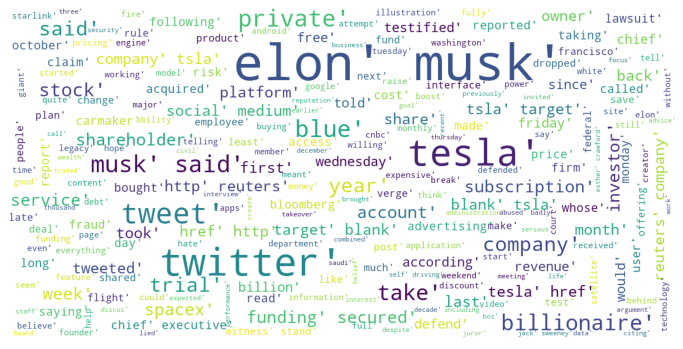

In [105]:
plot_word_cloud(corpus_pos)

In [41]:
###########################################################
##
##
##                  Clustering
##
##
############################################################
## Our DF
print(count_vect_df)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

My_KMean= KMeans(n_clusters=3)
My_KMean.fit(df_Musk)
My_labels=My_KMean.predict(df_Musk)
print(My_labels)

from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns

My_KMean2 = KMeans(n_clusters=4).fit(preprocessing.normalize(df_Musk))
My_KMean2.fit(df_Musk)
My_labels2=My_KMean2.predict(df_Musk)
print(My_labels2)

My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(df_Musk)
My_labels3=My_KMean3.predict(df_Musk)
print("Silhouette Score for k = 3 \n",silhouette_score(df_Musk, My_labels3))


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(MyDTM)
print(cosdist)
print(np.round(cosdist,3))  #cos dist should be .02

#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)
plt.show()


     abandoned  aber  ability  able  aboard  abonn  abonnement  about  \
0            0     0        0     0       0      0           0      0   
1            0     0        0     0       0      0           0      0   
2            0     0        0     0       0      0           0      0   
3            0     0        0     0       0      0           0      0   
4            0     0        0     0       0      0           0      0   
..         ...   ...      ...   ...     ...    ...         ...    ...   
493          0     0        0     0       0      0           0      0   
494          0     0        0     0       0      0           0      0   
495          0     0        0     0       0      0           0      0   
496          0     0        0     0       0      0           0      0   
497          0     0        0     0       0      0           0      0   

     abruptly  abuelo  ...  zagraniczne  zahlen  zahra  zero  zhou  zienia  \
0           0       0  ...            0      

ValueError: could not convert string to float: 'giant alienating customers bringing less revenue falling behind legacy carmakers'

In [117]:
##############################################
##
##   LDA Topics Modeling
##
##
#########################################################

NUM_TOPICS= 4
MyDTM = count_vect_df

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(count_vect_df)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, countVectorizer)



(100, 4)
LDA Model:
Topic 0:
[('twitter', 18.579199783152006), ('musk', 16.302562704627796), ('elon', 14.932985337435664), ('blue', 5.75155450876566), ('medium', 5.251340612200277), ('social', 5.212907883746611), ('last', 4.376999147929099), ('billionaire', 4.291604086012599), ('month', 3.63618235598785), ('platform', 3.5124976944077195)]
Topic 1:
[('musk', 41.85438476658875), ('elon', 36.071290319246785), ('tesla', 33.39330924867162), ('tweet', 11.485898481815402), ('tsla', 9.94089591138158), ('said', 8.635743954801383), ('take', 8.373005084433522), ('private', 8.193968965118028), ('funding', 7.548353984070561), ('trial', 7.462976181670483)]
Topic 2:
[('musk', 16.06035228641514), ('elon', 15.961853266268214), ('twitter', 12.587532437760423), ('company', 8.857018401837541), ('said', 7.311091217388478), ('year', 6.038616276672115), ('account', 5.959854747066671), ('tweet', 5.233069080951278), ('service', 5.147042473275133), ('chief', 3.7520168520739596)]
Topic 3:
[('revenue', 3.53877926

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [130]:
############## Fancy Plot.................
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.sklearn as LDAvis
import pyLDAvis

# ## conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook() ## not using notebook



In [136]:
#doc_lengths = MyDTM.sum(axis=1).values.tolist()
#panel = LDAvis.prepare(lda_model, MyDTM, countVectorizer, mds='tsne', doc_lengths=doc_lengths)
#pyLDAvis.save_html(panel, "InTheNews.html")
#

AttributeError: 'Series' object has no attribute 'getA1'

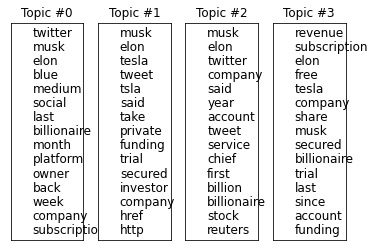

In [144]:
################ Another fun vis for LDA

word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 12

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
#plt.show()
plt.savefig("TopicsVis.pdf")

## Clustering

In [147]:
###########################################################
##
##
##                  Clustering
##
##
############################################################
## Our DF
My_Orig_DF = count_vect_df
print(My_Orig_DF)

#from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.cluster import KMeans

My_KMean= KMeans(n_clusters=3)
My_KMean.fit(My_Orig_DF)
My_labels=My_KMean.predict(My_Orig_DF)
print(My_labels)

#from sklearn import preprocessing
#from sklearn.cluster import KMeans
#import seaborn as sns

My_KMean2 = KMeans(n_clusters=4).fit(preprocessing.normalize(My_Orig_DF))
My_KMean2.fit(My_Orig_DF)
My_labels2=My_KMean2.predict(My_Orig_DF)
print(My_labels2)

My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(My_Orig_DF)
My_labels3=My_KMean3.predict(My_Orig_DF)
print("Silhouette Score for k = 3 \n",silhouette_score(My_Orig_DF, My_labels3))


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(MyDTM)
print(cosdist)
print(np.round(cosdist,3))  #cos dist should be .02


    according  account  back  billion  billionaire  blank  blue  chief  \
0           0        0     0        0            0      0     0      0   
1           0        0     1        0            0      0     0      1   
2           0        0     0        0            0      0     0      0   
3           1        0     0        0            0      0     0      0   
4           0        0     0        0            0      0     0      0   
..        ...      ...   ...      ...          ...    ...   ...    ...   
95          0        0     0        0            0      0     0      0   
96          0        0     0        0            0      0     0      0   
97          0        0     0        0            0      0     0      0   
98          0        0     0        0            0      1     0      0   
99          0        0     0        0            0      0     0      0   

    company  defend  ...  testified  told  took  trial  tsla  tweet  tweeted  \
0         0       0  ...       

### VIsualizing the Clusters

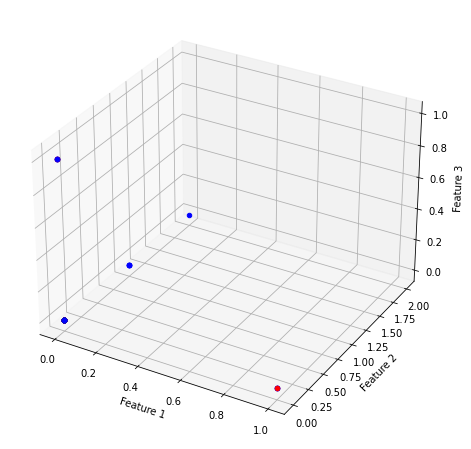

In [153]:
# 3 Clusters
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(len(My_Orig_DF)):
    ax.scatter(My_Orig_DF.iloc[i, 0], My_Orig_DF.iloc[i, 1], My_Orig_DF.iloc[i, 2], c=colors[My_labels[i]])

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

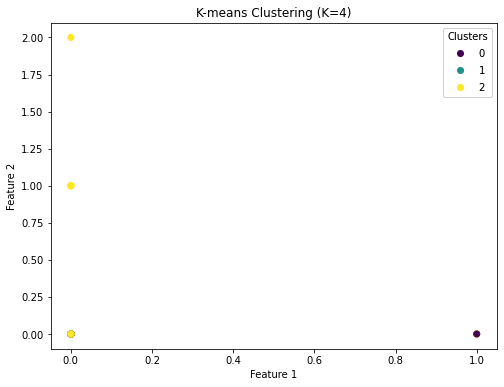

In [154]:
# 4 CLusters
import matplotlib.pyplot as plt

# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(My_Orig_DF.iloc[:, 0], My_Orig_DF.iloc[:, 1], c=My_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering (K=4)')
# Add a legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()

In [148]:
print(np.round(cosdist,3))  #cos dist should be .02

[[ 0.     1.     1.    ...  1.     1.     1.   ]
 [ 1.    -0.     0.524 ...  0.613  0.783  0.592]
 [ 1.     0.524 -0.    ...  0.578  0.588  0.5  ]
 ...
 [ 1.     0.613  0.578 ...  0.     0.776  0.684]
 [ 1.     0.783  0.588 ...  0.776  0.     0.646]
 [ 1.     0.592  0.5   ...  0.684  0.646  0.   ]]


### Elbow Plot for number of clusters

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



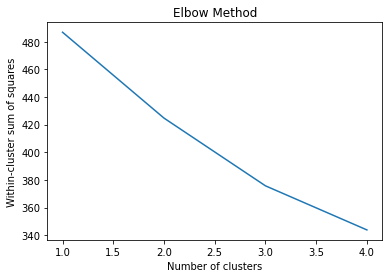

In [159]:
wcss = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(My_Orig_DF)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

### Silhouette method

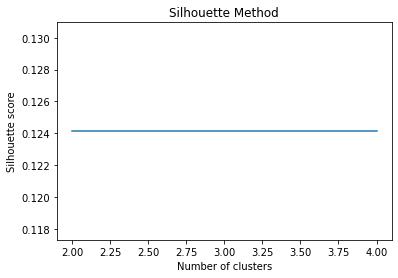

In [163]:
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(My_Orig_DF)
    silhouette_avg = silhouette_score(My_Orig_DF, My_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results
plt.plot(range(2, 5), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [165]:
My_Orig_DF

,according,account,back,billion,billionaire,blank,blue,chief,company,defend,...,testified,told,took,trial,tsla,tweet,tweeted,twitter,week,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
98,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,2,0,0,0,1,0


## Hierarchical Clustering

[[2.60000000e+01 6.60000000e+01 0.00000000e+00 2.00000000e+00]
 [3.40000000e+01 4.00000000e+01 0.00000000e+00 2.00000000e+00]
 [4.30000000e+01 1.01000000e+02 0.00000000e+00 3.00000000e+00]
 [4.90000000e+01 9.90000000e+01 0.00000000e+00 2.00000000e+00]
 [6.20000000e+01 7.20000000e+01 0.00000000e+00 2.00000000e+00]
 [1.70000000e+01 2.00000000e+01 0.00000000e+00 2.00000000e+00]
 [4.50000000e+01 1.05000000e+02 0.00000000e+00 3.00000000e+00]
 [6.40000000e+01 7.70000000e+01 0.00000000e+00 2.00000000e+00]
 [1.02000000e+02 1.03000000e+02 1.71995011e-16 5.00000000e+00]
 [6.90000000e+01 9.80000000e+01 4.52182708e-01 2.00000000e+00]
 [9.00000000e+00 7.10000000e+01 5.82200295e-01 2.00000000e+00]
 [8.30000000e+01 8.60000000e+01 5.93783938e-01 2.00000000e+00]
 [7.30000000e+01 8.10000000e+01 6.10177091e-01 2.00000000e+00]
 [2.70000000e+01 1.08000000e+02 6.14624777e-01 6.00000000e+00]
 [7.00000000e+01 1.12000000e+02 6.54253163e-01 3.00000000e+00]
 [4.80000000e+01 5.40000000e+01 6.59751746e-01 2.000000

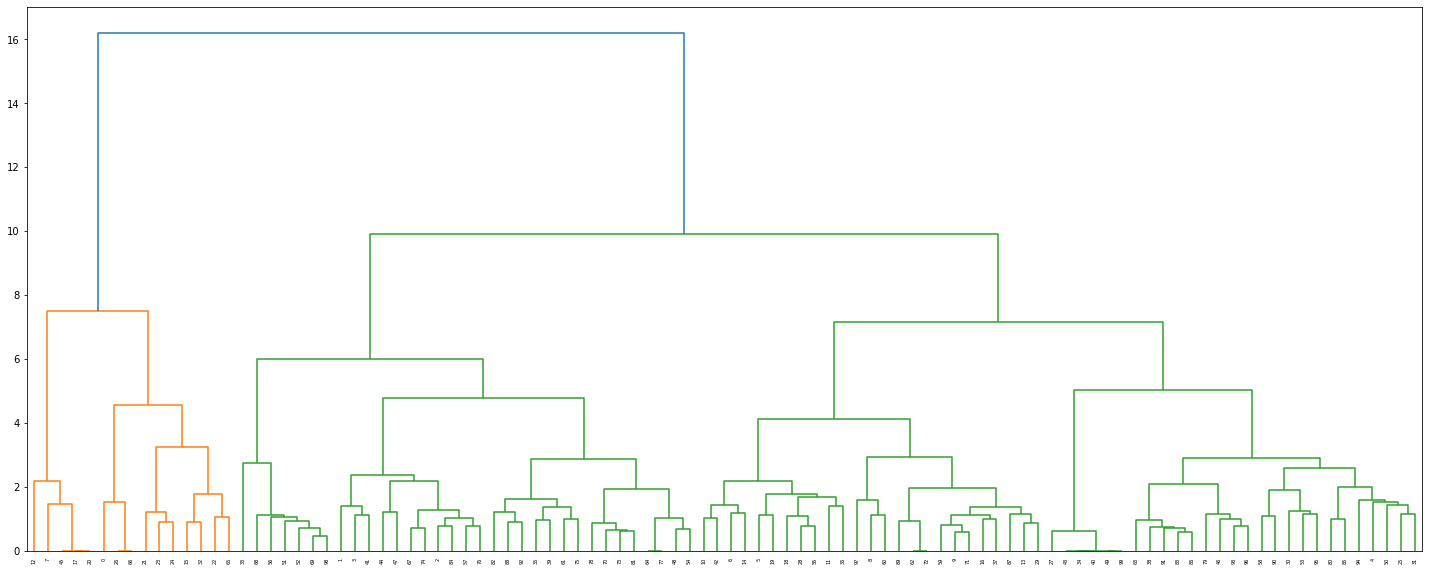

In [150]:
#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)
plt.show()